# Clustering
Idea: use different clustering algorithms and see if they correctly cluster the thermal comfort

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sns as sns
import torch
import torch.optim as optim
import seaborn as sns

# Import data

In [2]:
### Load the data
seed = 90
data_path = 'data/output/data_complete_grouped_2022-06-22.csv'
df = pd.read_csv(data_path)

In [3]:
df

,dataset,Outside Temperature,Avg. Temperature,RH,va,Tg,Gender,Age,Height,Weight,Duration,Icl,Thermal feeling (global)
0,August,15.69,18.560,73.440,0.040,17.870,0,23,169,74,7.5,1.06280,-1
1,August,15.59,19.185,74.410,0.155,18.125,1,18,186,105,22.5,0.82065,0
2,August,15.69,19.580,73.255,0.020,18.905,0,33,160,45,7.5,0.72045,0
3,August,15.69,19.105,73.275,0.240,18.155,0,26,167,59,7.5,0.65365,-1
4,August,15.69,19.050,77.180,0.240,18.620,0,47,172,70,7.5,0.74550,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,April,8.10,18.265,58.815,0.070,19.625,1,34,186,78,12.5,1.07115,0
270,April,7.90,18.265,58.885,0.070,19.625,0,26,172,64,12.5,1.24650,1
271,April,7.90,17.325,58.420,0.080,19.155,1,26,180,85,10.0,1.27155,0
272,April,7.70,17.020,69.170,0.070,16.690,1,27,185,95,2.5,1.09620,-1


# Scale Data

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['dataset', 'Thermal feeling (global)']))
#X = df.drop(columns=['dataset', 'Thermal feeling (global)']).to_numpy()
#df['Thermal feeling (global)'] = df['Thermal feeling (global)'] - df['Thermal feeling (global)'].min()
y = df['Thermal feeling (global)']

In [4]:
X = df.drop(columns=['dataset', 'Thermal feeling (global)'])
#X = df.drop(columns=['dataset', 'Thermal feeling (global)']).to_numpy()
#df['Thermal feeling (global)'] = df['Thermal feeling (global)'] - df['Thermal feeling (global)'].min()
y = df['Thermal feeling (global)']

# Cluster

In [5]:
k = y.unique().shape[0]

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
df['k_means'] = kmeans.labels_


from sklearn.decomposition import NMF
model = NMF(n_components=k, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X - X.min())
H = model.components_
df['nmf'] = np.argmax(W, axis=1)


In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)
clf.predict(X[:20])

array([-1,  0,  0, -1,  1, -1,  0,  1,  1,  1, -1,  0,  0,  0, -1, -1,  0,
        0,  1,  1])

In [ ]:

#print(clf.predict([[0, 0, 0, 0]]))

from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X, y)
df['svm'] = clf.predict(X)


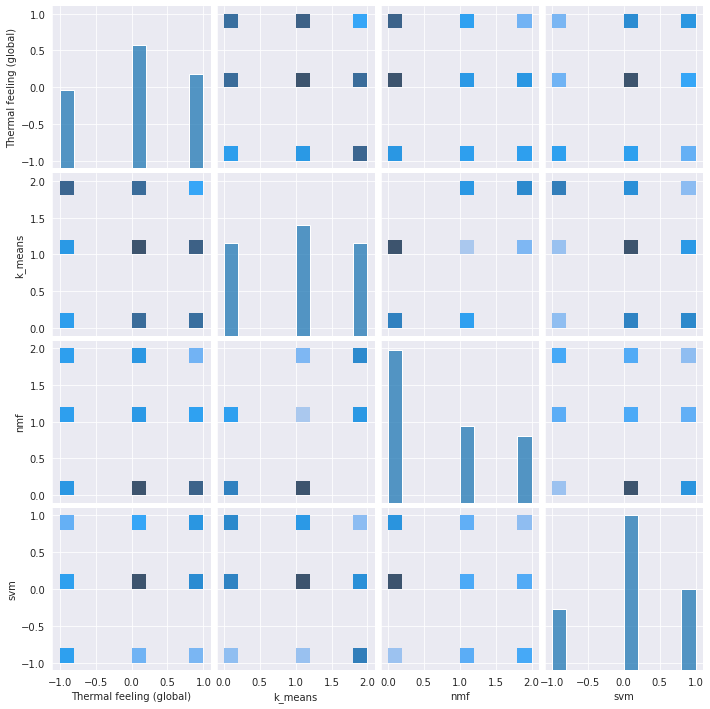

In [8]:
sns.pairplot(df[['Thermal feeling (global)', 'k_means', 'nmf','dataset', 'svm']], kind='hist')
plt.show()

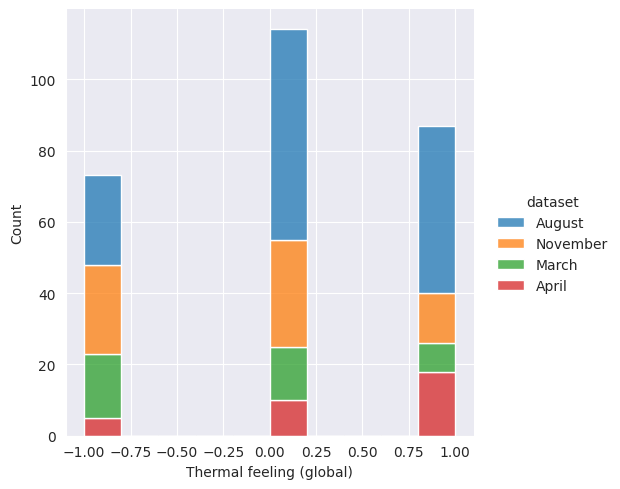

In [9]:
sns.displot(data=df, x="Thermal feeling (global)", hue="dataset", multiple="stack")
plt.show()

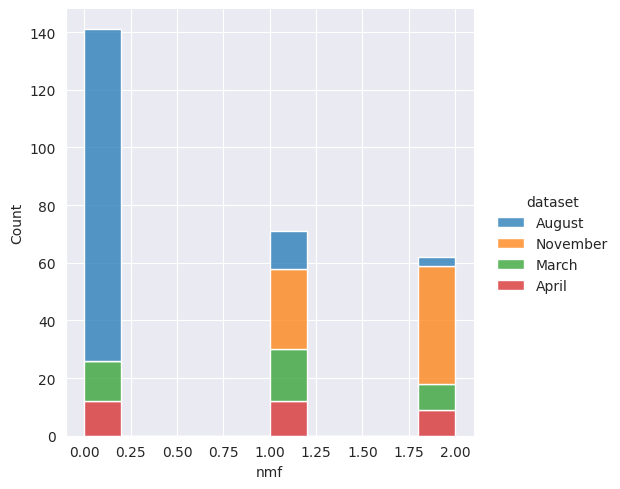

In [10]:
sns.displot(data=df, x="nmf", hue="dataset", multiple="stack")
plt.show()

In [11]:
H

array([[1.81698024, 1.8239421 , 0.37290531, 1.36324523, 1.82217075,
        0.48236812, 0.60945573, 0.40561644, 0.43159051, 0.99541682,
        0.09358794],
       [0.1727851 , 0.21615808, 0.56873857, 0.1729727 , 0.2184443 ,
        2.01385201, 0.34360482, 2.06812771, 1.84845481, 0.42029127,
        0.7695042 ],
       [0.41319894, 0.34510716, 1.8934179 , 1.04279148, 0.34139801,
        0.        , 1.85578456, 0.04695646, 0.29031275, 1.24978652,
        1.97253804]])

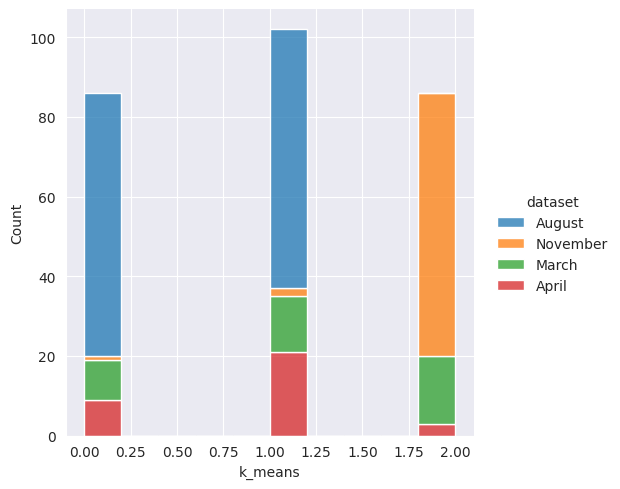

In [12]:
sns.displot(data=df, x="k_means", hue="dataset", multiple="stack")
plt.show()

In [13]:
kmeans.cluster_centers_

array([[ 0.66938226,  0.6621366 , -0.2894575 ,  0.27453189,  0.65490591,
         1.01361216, -0.11734164,  0.90429518,  0.75035929,  0.24458856,
        -0.51732773],
       [ 0.4857663 ,  0.53056916, -0.25072548,  0.09786448,  0.5469504 ,
        -0.82536718, -0.05694231, -0.72916301, -0.61835266, -0.04616981,
        -0.16781457],
       [-1.24552369, -1.29141631,  0.58682959, -0.39060371, -1.30361453,
        -0.03468829,  0.18487787, -0.03947394, -0.01696427, -0.18982901,
         0.71636362]])

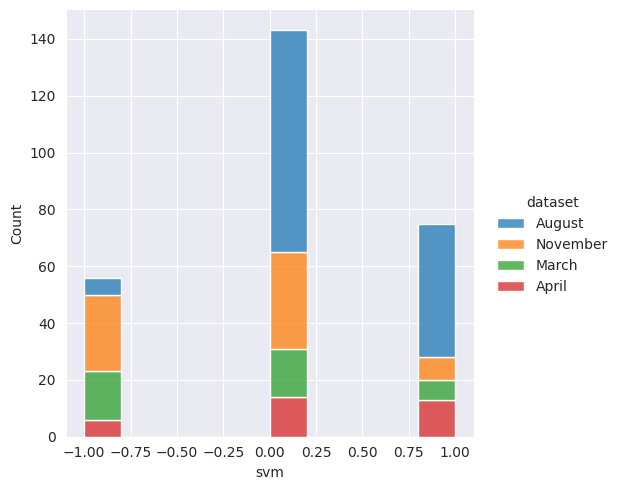

In [14]:
sns.displot(data=df, x="svm", hue="dataset", multiple="stack")
plt.show()